This is just a helper notebook for visualizing things, and computing statistics.

In [122]:
from aim import Repo
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import ImageGrid
from model_helpers import load_model
from pong_train import PongPolicy
from scipy import stats

aim_repo = Repo('.')

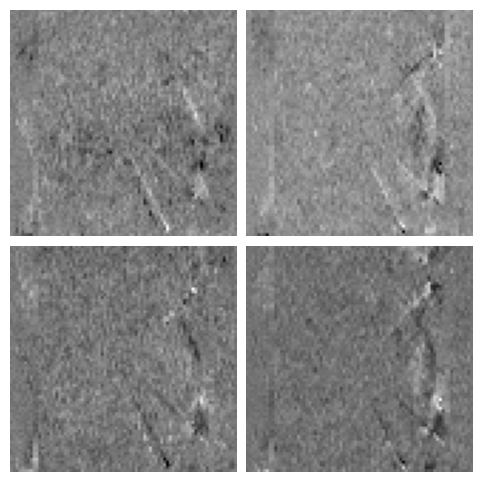

In [123]:
model_1: PongPolicy = load_model("b60ba6f06be54de99c2f890f")
model_2: PongPolicy = load_model("a53b7b3457f14f4e99172150")

fig = pyplot.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1, )

for i, ax in enumerate(grid):
  ax.axis('off')

  if i == 0 or i == 2:
    ax.imshow(model_1.layer1.weight[i].detach().numpy().reshape(80, 80), cmap=pyplot.get_cmap('gray'))
  elif i == 1 or i == 3:
    ax.imshow(model_2.layer1.weight[i].detach().numpy().reshape(80, 80), cmap=pyplot.get_cmap('gray'))


In [133]:
def calc_stats(metric_name, run_hash):
  query = f"metric.name == '{metric_name}'"

  for run_metrics_collection in aim_repo.query_metrics(query, report_mode=0).iter_runs():
      for metric in run_metrics_collection:
          if metric.run.hash == run_hash:
            _, metric_values = metric.values.sparse_numpy()
            variance = stats.tvar(metric_values)
            sem = stats.sem(metric_values)
            mean = stats.tmean(metric_values)
            std = stats.tstd(metric_values)
            print(f'{metric_name}: mean = {mean:.2f}, variance = {variance:.2f}, std: {std:.2f}, sem = {sem:.2f}')

In [134]:
# Agent 1
calc_stats('loss', 'b60ba6f06be54de99c2f890f')
calc_stats('total_reward', 'b60ba6f06be54de99c2f890f')

loss: mean = -130.51, variance = 64041.91, std: 253.07, sem = 1.79
total_reward: mean = -3.95, variance = 21.45, std: 4.63, sem = 0.03


In [135]:
# Agent 2
calc_stats('loss', 'a53b7b3457f14f4e99172150')
calc_stats('total_reward', 'a53b7b3457f14f4e99172150')

loss: mean = -231.95, variance = 165097.00, std: 406.32, sem = 2.87
total_reward: mean = -3.54, variance = 119.93, std: 10.95, sem = 0.08


In [136]:
# Agent 3
calc_stats('loss', '2b9c7df2eca04bb49e31404f')
calc_stats('total_reward', '2b9c7df2eca04bb49e31404f')

loss: mean = -9.52, variance = 263.11, std: 16.22, sem = 0.11
total_reward: mean = 0.19, variance = 80.65, std: 8.98, sem = 0.06
